# Welcome to the 'First steps with pandas'!

After this workshop you can (hopefully) call yourselves Data Scientists!

## What is pandas?

> pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

## Why to use it?

### It has ready solutions for most of data-related problems
- fast development
- no reinventing wheel
- fewer mistakes/bugs

In [1]:
# # In case of no Internet, use:
# # pd.read_json('data/cached_Python.json')

# (
#     pd.read_json('https://raw.githubusercontent.com/Nozdi/first-steps-with-pandas-workshop/master/data/cached_python.json')
#     .resample('1W')
#     .mean()
#     ['daily_views']
# )

### It is easy to pick up
- few simple concepts that are very powerful
- easy, standardized API
- good code readability

### It is reasonably fast

In [3]:
import pandas as pd

In [4]:
some_data = [ list(range(1,100)) for x in range(1,1000) ]
some_df = pd.DataFrame(some_data)


def standard_way(data):
    return [[col*2 for col in row] for row in data]


def pandas_way(df):
    return df * 2

In [5]:
%timeit standard_way(some_data)

3.32 ms ± 184 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [6]:
%timeit pandas_way(some_df)

78.9 µs ± 2.74 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


## Data structures

### Series

> Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

In [7]:
strengths = pd.Series([400, 200, 300, 400, 500])
strengths

0    400
1    200
2    300
3    400
4    500
dtype: int64

In [8]:
names = pd.Series(["Batman", "Robin", "Spiderman", "Robocop", "Terminator"])
names

0        Batman
1         Robin
2     Spiderman
3       Robocop
4    Terminator
dtype: object

### DataFrame

> DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict of Series objects.

#### Creating

In [9]:
heroes = pd.DataFrame({
    'hero': names,
    'strength': strengths
})
heroes

,hero,strength
0,Batman,400
1,Robin,200
2,Spiderman,300
3,Robocop,400
4,Terminator,500


In [10]:
other_heroes = pd.DataFrame([
    dict(hero="Hercules", strength=800),
    dict(hero="Conan")
])
other_heroes

,hero,strength
0,Hercules,800.0
1,Conan,NaN


In [11]:
another_heroes = pd.DataFrame([
    pd.Series(["Wonder Woman", 10, 3], index=["hero", "strength", "cookies"]),
    pd.Series(["Xena", 20, 0], index=["hero", "strength", "cookies"])
])
another_heroes

,hero,strength,cookies
0,Wonder Woman,10,3
1,Xena,20,0


#### Meta data

In [12]:
another_heroes.columns

Index(['hero', 'strength', 'cookies'], dtype='object')

In [13]:
another_heroes.shape

(2, 3)

In [14]:
another_heroes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hero      2 non-null      object
 1   strength  2 non-null      int64 
 2   cookies   2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 176.0+ bytes


#### Selecting
```[string] --> Series
[ list of strings ] --> DataFrame```

In [15]:
another_heroes['cookies']

0    3
1    0
Name: cookies, dtype: int64

In [16]:
another_heroes.cookies

0    3
1    0
Name: cookies, dtype: int64

In [17]:
another_heroes[ ['hero', 'cookies'] ]

,hero,cookies
0,Wonder Woman,3
1,Xena,0


#### Chaining (most of operations on DataFrame returns new DataFrame or Series)

In [18]:
another_heroes[['hero', 'cookies']][['cookies']]

,cookies
0,3
1,0


In [19]:
another_heroes[['hero', 'cookies']][['cookies']]['cookies']

0    3
1    0
Name: cookies, dtype: int64

### EXERCISE

Create DataFrame presented below in 3 different ways
```
                                         movie_title  imdb_score
0                                            Avatar          7.9
1          Pirates of the Caribbean: At World's End          7.1
2                                           Spectre          6.8
```

Help: http://pandas.pydata.org/pandas-docs/stable/dsintro.html#from-dict-of-series-or-dicts

#### With dict of Series

In [ ]:
# Solution here

#### With list of dicts

In [ ]:
# Solution here

#### With list of Series

In [ ]:
# Solution here

## I/O part I

### Reading popular formats / data sources

In [ ]:
# Uncomment and press tab..
# pd.read_
# SQL, csv, hdf

In [ ]:
# pd.read_csv?

### EXERCISE

#### Load movies from data/movies.csv to variable called `movies`

In [24]:
# Solution here
movies = pd.read_csv("./data/movies.csv")
movies.head()

,movie_title,title_year,budget,gross,genres,language,country,movie_facebook_likes,imdb_score,num_voted_users,...,actor_3_name,actor_3_facebook_likes,cast_total_facebook_likes,color,duration,plot_keywords,content_rating,aspect_ratio,facenumber_in_poster,movie_imdb_link
0,Avatar,2009.0,237000000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,English,USA,33000,7.9,886204,...,Wes Studi,855.0,4834,Color,178.0,avatar|future|marine|native|paraplegic,PG-13,1.78,0.0,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,2007.0,300000000.0,309404152.0,Action|Adventure|Fantasy,English,USA,0,7.1,471220,...,Jack Davenport,1000.0,48350,Color,169.0,goddess|marriage ceremony|marriage proposal|pi...,PG-13,2.35,0.0,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,2015.0,245000000.0,200074175.0,Action|Adventure|Thriller,English,UK,85000,6.8,275868,...,Stephanie Sigman,161.0,11700,Color,148.0,bomb|espionage|sequel|spy|terrorist,PG-13,2.35,1.0,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,2012.0,250000000.0,448130642.0,Action|Thriller,English,USA,164000,8.5,1144337,...,Joseph Gordon-Levitt,23000.0,106759,Color,164.0,deception|imprisonment|lawlessness|police offi...,PG-13,2.35,0.0,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,Documentary,NaN,NaN,0,7.1,8,...,NaN,NaN,143,NaN,NaN,NaN,NaN,NaN,0.0,http://www.imdb.com/title/tt5289954/?ref_=fn_t...


####  Analyze what dimensions and columns it has

In [ ]:
# Solution here

## Filtering

In [ ]:
heroes

### Boolean indexing

In [ ]:
heroes['strength'] == 400

In [ ]:
heroes[heroes['strength'] == 400]

In [ ]:
heroes[heroes['strength'] > 400]

### Multiple conditions

In [ ]:
try:
    heroes[200 < heroes['strength'] < 400]
except ValueError:
    print("This cool Python syntax ain't work :(")

In [ ]:
heroes[
    (heroes['strength'] > 200) & 
    (heroes['strength'] < 400)
]

In [ ]:
heroes[
    (heroes['strength'] <= 200) |
    (heroes['strength'] >= 400)
]

### Negation

`~` is a negation operator

In [ ]:
~(heroes['strength'] == 400)

In [ ]:
heroes['strength'] != 400

In [ ]:
heroes[~(
    (heroes['strength'] <= 200) |
    (heroes['strength'] >= 400)
)]

### Filtering for containing one of many values (SQL's IN)

In [ ]:
heroes[
    heroes['hero'].isin(['Batman', 'Robin'])
]

### EXERCISE

#### What movies has been directed by Clint Eastwood?

In [ ]:
# Solution here

#### What movies have earned above $500m?

In [ ]:
# Solution here

#### Are there any Polish movies?

In [ ]:
# Solution here

#### What are really popular great movies? (> 100k FB likes, > 8.5 IMDB score)

In [ ]:
# Solution here

#### In what movies main role was played by brutals like "Jason Statham", "Sylvester Stallone" or god ("Morgan Freeman")?

In [ ]:
# Solution here

## I/O part O

### As numpy array

In [ ]:
heroes.values

### As (list) of dicts

In [ ]:
heroes.to_dict()

In [ ]:
heroes.to_dict('records')

### As popular data format

In [ ]:
heroes.to_json()

In [ ]:
heroes.to_json(orient='records')

In [ ]:
heroes.to_csv()

In [ ]:
heroes.to_csv(index=False)

In [ ]:
heroes.to_csv('data/heroes.csv', index=False)

### EXERCISE

#### Create a csv with movie titles and cast (actors) of movies with budget above $200m

In [ ]:
# Solution here

#### Create a list of dicts with movie titles and facebook likes of all Christopher Nolan's movies

In [ ]:
# Solution here

## New columns

In [ ]:
heroes

### Creating new column

In [ ]:
heroes['health'] = np.NaN
heroes.head()

In [ ]:
heroes['health'] = 100
heroes.head()

In [ ]:
heroes['height'] = [180, 170, 175, 190, 185]
heroes

In [ ]:
heroes['is_hungry'] = pd.Series([True, False, False, True, True])
heroes

### Vector operations

In [ ]:
heroes['strength'] * 2

In [ ]:
heroes['strength'] / heroes['height']

In [ ]:
heroes['strength_per_cm'] = heroes['strength'] / heroes['height']
heroes

### Map, apply, applymap, str

In [25]:
pd.Series([1, 2, 3]).map(lambda x: x**3)

0     1
1     8
2    27
dtype: int64

In [26]:
pd.Series(['Batman', 'Robin']).map(lambda x: x[:2])

0    Ba
1    Ro
dtype: object

In [27]:
# however, more idiomatic approach for strings is to do..
pd.Series(['Batman', 'Robin']).str[:2]

0    Ba
1    Ro
dtype: object

In [28]:
pd.Series(['Batman', 'Robin']).str.lower()

0    batman
1     robin
dtype: object

In [29]:
pd.Series([
    ['Batman', 'Robin'],
    ['Robocop']
]).map(len)

0    2
1    1
dtype: int64

In [30]:
heroes['code'] = heroes['hero'].map(lambda name: name[:2])
heroes

,hero,strength,code
0,Batman,400,Ba
1,Robin,200,Ro
2,Spiderman,300,Sp
3,Robocop,400,Ro
4,Terminator,500,Te


In [31]:
heroes['effective_strength'] = heroes.apply(
    lambda row: (not row['is_hungry']) * row['strength'],
    axis=1
)
heroes.head()

KeyError: 'is_hungry'

In [32]:
heroes[['health', 'strength']] = heroes[['health', 'strength']].applymap(
    lambda x: x + 100
)
heroes

KeyError: "['health'] not in index"

#### Cheatsheet

```
map: 1 => 1
apply: n => 1
applymap: n => n
```

### Sorting and value counts (bonus skill)

In [ ]:
heroes['strength'].value_counts()

In [ ]:
heroes.sort_values('strength')

In [ ]:
heroes.sort_values(
    ['is_hungry', 'code'],
    ascending=[False, True]
)

### EXERCISE

#### What are 10 most profitable movies? (ratio between gross and budget)

In [ ]:
# Solution here

#### Create a column 'first_genre'. What is the distribution of values in this column?

In [ ]:
# Solution here

## Visualizing data

In [ ]:
heroes

### Basic stats

In [ ]:
heroes.describe()

### Plotting

In [33]:
%matplotlib inline

<AxesSubplot:>

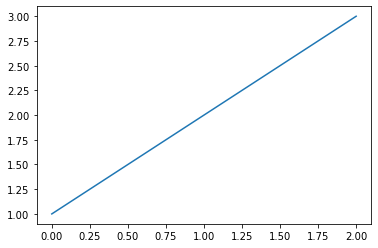

In [34]:
pd.Series([1, 2, 3]).plot()

<AxesSubplot:>

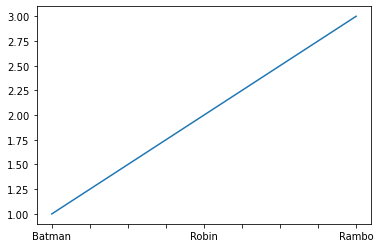

In [35]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot()

<AxesSubplot:>

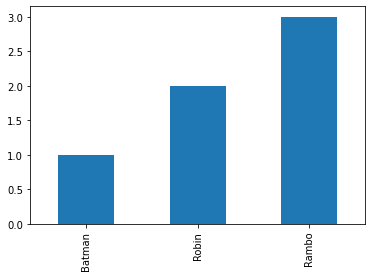

In [36]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='bar')

<AxesSubplot:>

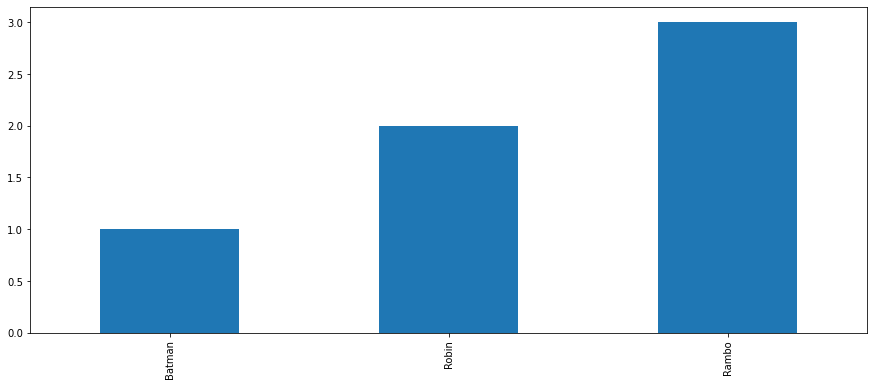

In [37]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(
    kind='bar',
    figsize=(15, 6)
)

<AxesSubplot:ylabel='None'>

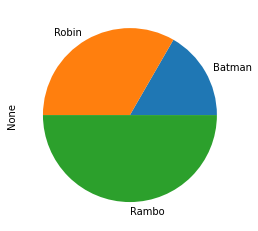

In [38]:
pd.Series([1, 2, 3], index=['Batman', 'Robin', 'Rambo']).plot(kind='pie')

<AxesSubplot:>

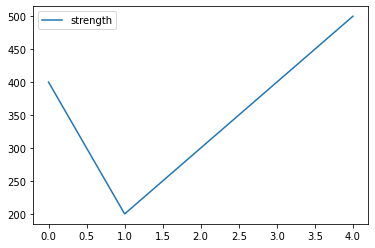

In [39]:
heroes.plot()

In [40]:
indexed_heroes = heroes.set_index('hero')
indexed_heroes

,strength,code
hero,,
Batman,400,Ba
Robin,200,Ro
Spiderman,300,Sp
Robocop,400,Ro
Terminator,500,Te


<AxesSubplot:xlabel='hero'>

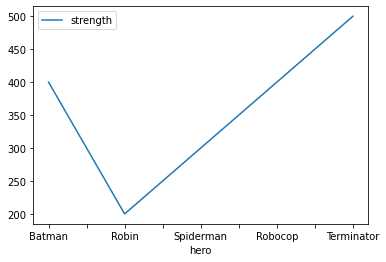

In [41]:
indexed_heroes.plot()

<AxesSubplot:ylabel='hero'>

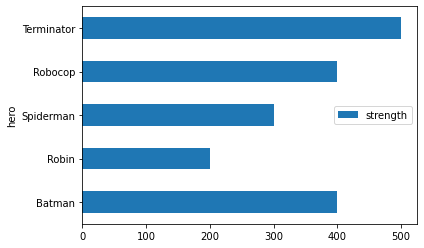

In [42]:
indexed_heroes.plot(kind='barh')

array([<AxesSubplot:title={'center':'strength'}, xlabel='hero'>],
      dtype=object)

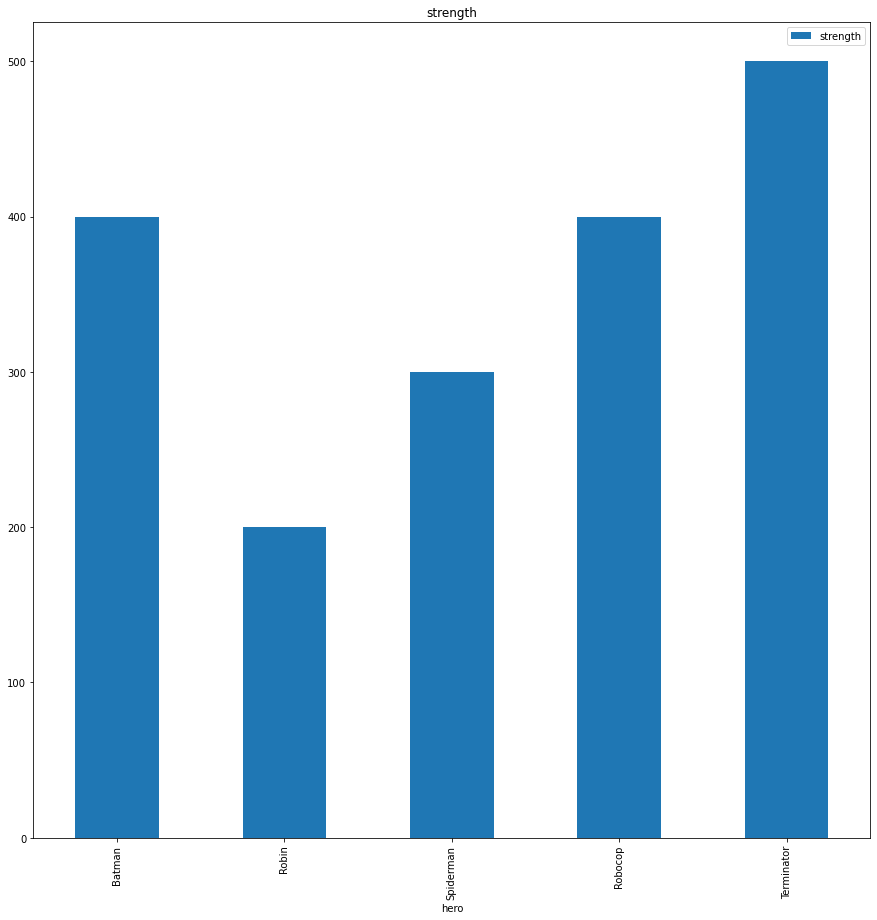

In [43]:
indexed_heroes.plot(kind='bar', subplots=True, figsize=(15, 15))

In [44]:
indexed_heroes[['height', 'strength']].plot(kind='bar')

KeyError: "['height'] not in index"

In [45]:
heroes.plot(x='hero', y=['height', 'strength'], kind='bar')

KeyError: "['height'] not in index"

In [ ]:
# alternative to subplots
heroes.plot(
    x='hero',
    y=['height', 'strength'],
    kind='bar',
    secondary_y='strength',
    figsize=(10,8)
)

In [ ]:
heroes.plot(
    x='hero',
    y=['height', 'strength'],
    kind='bar',
    secondary_y='strength',
    title='Super plot of super heroes',
    figsize=(10,8)
)

### Histogram

In [ ]:
heroes.hist(figsize=(10, 10))

In [ ]:
heroes.hist(
    figsize=(10, 10),
    bins=2
)

### DataFrames everywhere.. are easy to plot

In [ ]:
heroes.describe()['strength'].plot(kind='bar')

### EXERCISE

#### Create a chart presenting grosses of movies directed by Christopher Nolan

In [ ]:
# Solution here

#### What are typical durations of the movies?

In [ ]:
# Solution here

#### What is percentage distribution of first genre? (cake)

In [ ]:
# Solution here

## Aggregation

### Grouping

![caption](files/split-apply-combine.jpg)

> https://www.safaribooksonline.com/library/view/learning-pandas/9781783985128/graphics/5128OS_09_01.jpg

In [ ]:
movie_heroes = pd.DataFrame({
    'hero': ['Batman', 'Robin', 'Spiderman', 'Robocop', 'Lex Luthor', 'Dr Octopus'],
    'movie': ['Batman', 'Batman', 'Spiderman', 'Robocop', 'Spiderman', 'Spiderman'],
    'strength': [400, 100, 400, 560, 89, 300],
    'speed': [100, 10, 200, 1, 20, None],
})
movie_heroes = movie_heroes.set_index('hero')
movie_heroes

In [ ]:
movie_heroes.groupby('movie')

In [ ]:
list(movie_heroes.groupby('movie'))

### Aggregating

In [ ]:
movie_heroes.groupby('movie').size()

In [ ]:
movie_heroes.groupby('movie').count()

In [ ]:
movie_heroes.groupby('movie')['speed'].sum()

In [ ]:
movie_heroes.groupby('movie').mean()

In [ ]:
movie_heroes.groupby('movie').apply(
    lambda group: group['strength'] / group['strength'].max()
)

In [ ]:
movie_heroes.groupby('movie').agg({
    'speed': 'mean',
    'strength': 'max',
})

In [ ]:
movie_heroes = movie_heroes.reset_index()
movie_heroes

In [ ]:
movie_heroes.groupby(['movie', 'hero']).mean()

### EXERCISE

#### What was maximal gross in each year?

In [ ]:
# Solution here

#### Which director earns the most on average?

In [ ]:
# Solution here

# Index related operations

### Data alignment on Index

In [ ]:
movie_heroes

In [ ]:
apetite = pd.DataFrame([
    dict(hero='Spiderman', is_hungry=True),
    dict(hero='Robocop', is_hungry=False)
])
apetite

In [ ]:
movie_heroes['is_hungry'] = apetite['is_hungry']
movie_heroes

In [ ]:
apetite.index = [2, 3]

In [ ]:
movie_heroes['is_hungry'] = apetite['is_hungry']
movie_heroes

### Setting index

In [ ]:
indexed_movie_heroes = movie_heroes.set_index('hero')
indexed_movie_heroes

In [ ]:
indexed_apetite = apetite.set_index('hero')
indexed_apetite

In [ ]:
# and alignment works well automagically..

indexed_movie_heroes['is_hungry'] = indexed_apetite['is_hungry']

In [ ]:
indexed_movie_heroes

### Merging two DFs (a'la SQL join)

In [ ]:
movie_heroes

In [ ]:
apetite

In [ ]:
# couple of other arguments available here

pd.merge(
    movie_heroes[['hero', 'speed']],
    apetite,
    on=['hero'],
    how='outer'
)

### DateTime operations

In [ ]:
spiderman_meals = pd.DataFrame([
        dict(time='2016-10-15 10:00', calories=300),
        dict(time='2016-10-15 13:00', calories=900),
        dict(time='2016-10-15 15:00', calories=1200),
        dict(time='2016-10-15 21:00', calories=700),
        dict(time='2016-10-16 07:00', calories=1600),
        dict(time='2016-10-16 13:00', calories=600),
        dict(time='2016-10-16 16:00', calories=900),
        dict(time='2016-10-16 20:00', calories=500),
        dict(time='2016-10-16 21:00', calories=300),
        dict(time='2016-10-17 08:00', calories=900),
    ])
spiderman_meals

In [ ]:
spiderman_meals.dtypes

In [ ]:
spiderman_meals['time'] = pd.to_datetime(spiderman_meals['time'])
spiderman_meals.dtypes

In [ ]:
spiderman_meals

In [ ]:
spiderman_meals = spiderman_meals.set_index('time')
spiderman_meals

In [ ]:
spiderman_meals.index

#### Filtering

In [ ]:
spiderman_meals["2016-10-15"]

In [ ]:
spiderman_meals["2016-10-16 10:00":]

In [ ]:
spiderman_meals["2016-10-16 10:00":"2016-10-16 20:00"]

In [ ]:
spiderman_meals["2016-10"]

#### Resampling (downsampling and upsampling)

In [ ]:
spiderman_meals.resample('1D').sum()

In [ ]:
spiderman_meals.resample('1H').mean()

In [ ]:
spiderman_meals.resample('1H').ffill()

In [ ]:
spiderman_meals.resample('1D').first()

### EXERCISE

#### Read Star Wars: The Force Awakens's tweets from data/theforceawakens_tweets.csv. Create DateTimeIndex from created_at column.

In [ ]:
# Solution here

#### How many tweets did Star Wars: The Force Awakens have in each of last days?

In [ ]:
# Solution here

#### What were the most popular tweeting times of the day for that movie?

In [ ]:
# Solution here

## Advanced topics + Advanced exercises

### Filling missing data

In [ ]:
heroes_with_missing = pd.DataFrame([
        ('Batman', None, None),
        ('Robin', None, 100),
        ('Spiderman', 400, 90),
        ('Robocop', 500, 95),
        ('Terminator', 600, None)
    ], columns=['hero', 'strength', 'health'])
heroes_with_missing

In [ ]:
heroes_with_missing.dropna()

In [ ]:
heroes_with_missing.fillna(0)

In [ ]:
heroes_with_missing.fillna({'strength': 10, 'health': 20})

In [ ]:
heroes_with_missing.fillna(heroes_with_missing.min())

In [ ]:
heroes_with_missing.fillna(heroes_with_missing.median())

### Scikit-learn

In [ ]:
pd.DataFrame({'x': [1, 2], 'y': [10, 20]}).plot(x='x', y='y', kind='scatter')

In [ ]:
from sklearn.linear_model import LinearRegression

X=[ [1], [2] ]
y=[ 10, 20 ]

clf = LinearRegression()
clf.fit(X, y)

In [ ]:
clf.predict([ [0.5], [2], [4] ])

In [ ]:
X = np.array([ [1], [2] ])
y = np.array([ 10, 20 ])

X

In [ ]:
clf = LinearRegression()
clf.fit(X, y)

In [ ]:
clf.predict( np.array([ [0.5], [2], [4] ]) )

In [ ]:
train_df = pd.DataFrame([
        (1, 10),
        (2, 20),
    ], columns=['x', 'y'])

train_df

In [ ]:
clf = LinearRegression()
clf.fit(train_df[['x']], train_df['y'])

In [ ]:
clf.predict([[0.5]])

In [ ]:
test_df = pd.DataFrame({'x': [0.5, 1.5, 4]})
test_df

In [ ]:
clf.predict(test_df[['x']])

In [ ]:
test_df['y'] = clf.predict(test_df[['x']])
test_df

In [ ]:
train_df['color'] = 'blue'
test_df['color'] = 'red'

all_df = train_df.append(test_df)
all_df.plot(x='x', y='y', kind='scatter', figsize=(10, 8), color=all_df['color'])

More models to try: http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

### EXERCISE

#### Integration with scikit-learn: Create a model that tries to predict gross of movie. Use any features of the movies dataset.

In [ ]:
# Solution here

#### Create a method discovering movies with plot keywords similar to the given list of keywords (i.e. `['magic', 'harry', 'wizard']`)

In [ ]:
# Solution here

#### Integration with Flask
In the file flask_exercise.py you'll find the scaffolding for Flask app.<br/>Create endpoints returning:
  - all movie titles available in the movies dataset
  - 10 worst rated movies ever
  - 10 best rated (imdb_score) movies in a given year

In [ ]:
# Solution in flask_exercise.py

## Thank you for your effort! We hope that you enjoyed the journey!

### Any questions?
### Any feedback?

You can reach us:
- rzeszutekjacek at the most popular service gmail.com
- mateuszflieger at as you would expect gmail.com

![caption](files/panda_shooting_rainbow.jpg)

> http://66.media.tumblr.com/b0e67112232adb68180fe7b988304abd/tumblr_inline_nw063rleWO1tp3b6e_1280.jpg